<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 5.1.1
# *Evaluating Classification Models*

In this lab you will be practicing evaluating classification models (Logistic Regression in particular) on a "Breast Cancer" data.

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Cross validation 
from sklearn.model_selection import KFold 
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn import svm
from sklearn.model_selection import cross_validate 
from sklearn.model_selection import cross_val_score

%matplotlib inline

### 1. Load Data

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. n the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].

This database is also available through the UW CS ftp server: ftp ftp.cs.wisc.edu cd math-prog/cpo-dataset/machine-learn/WDBC/

Also can be found on UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

Attribute Information:

1) ID number 2) Diagnosis (M = malignant, B = benign) 3-32)

Ten real-valued features are computed for each cell nucleus:

    a) radius (mean of distances from center to points on the perimeter) 
    b) texture (standard deviation of gray-scale values) 
    c) perimeter 
    d) area 
    e) smoothness (local variation in radius lengths) 
    f) compactness (perimeter^2 / area - 1.0) 
    g) concavity (severity of concave portions of the contour) 
    h) concave points (number of concave portions of the contour) 
    i) symmetry 
    j) fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

Missing attribute values: none

Class distribution: 357 benign, 212 malignant

In [2]:
breast_cancer_csv = 'dat/breast-cancer-wisconsin-data.csv'
breast_cancer = pd.read_csv(breast_cancer_csv)

### 2. EDA 

i. Explore dataset

ii. Check for nulls

In [8]:
breast_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [9]:
breast_cancer.duplicated().sum()

0

In [10]:
breast_cancer.head(3)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN


In [20]:
breast_cancer.iloc[:, -1].isnull().sum()

569

In [23]:
breast_cancer.drop(columns=breast_cancer.columns[-1], 
        axis=1, 
        inplace=True)

In [25]:
breast_cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### 3. Logistic Regression Model

#### 3.1 Use Logistic Regression

Use Logistic Regression and examine accuracy score, confusion matrix, classification report (see sklearn classification_report) for that model.

#### 3.2 Calculate the predicted labels (class) and predicted probabilities on the test dataset.

In [85]:
# M = 1
# B = 0
breast_cancer_mod = breast_cancer['diagnosis'].replace('M', 1)
breast_cancer_mod = breast_cancer_mod.replace('B', 0)
breast_cancer_mod.value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

In [87]:
np.shape(y)

(569, 1)

In [88]:
y = breast_cancer_mod

# Take all columns except target as predictor columns
predictor_columns = [c for c in breast_cancer.columns if c != 'diagnosis' and c != 'id']
# Load the dataset as a pandas data frame
X = pd.DataFrame(breast_cancer, columns = predictor_columns)

In [241]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

# Create Model
model = LogisticRegression(max_iter=3000)

# Fit Model
model.fit(X_train, y_train)
print('Training set score: ', model.score(X_train, y_train))
print('Test set score: ', model.score(X_test, y_test))

Training set score:  0.9604395604395605
Test set score:  0.9736842105263158


In [242]:
# predicted labels (class):
y_pred = model.predict(X_test)
#print('y_pred: ', y_pred)

# predicted probabilities:
y_pred_prod = model.predict_proba(X_test)
#print('y_pred_prod: ', y_pred_prod)

#### 3.3 Create the confusion matrix for your classfier's performance on the test set.

i. Create confusion_matrix

ii. Convert confusion_matrix to a dataframe

    index=['is_cancer', 'is_healthy']
    columns=['predicted_cancer','predicted_healthy']

In [243]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
confusion_matrix_df = pd.DataFrame(confusion_matrix, columns=['predicted_healthy','predicted_cancer']).rename(index={0: 'is_healthy', 1: 'is_cancer'})
print(confusion_matrix_df)

            predicted_healthy  predicted_cancer
is_healthy                 71                 0
is_cancer                   3                40


In [244]:
print(np.asarray([['TN', 'FP'], ['FN', 'TP']]))

[['TN' 'FP']
 ['FN' 'TP']]


#### 3.4 Calculate Accuracy

**Classification Accuracy:** Overall, how often is the classifier correct?
    
    (TP + TN) / float(TP + TN + FP + FN)

In [245]:
# ANSWER
TN, FP, FN, TP = confusion_matrix.ravel()
(TN, FP, FN, TP)

(71, 0, 3, 40)

In [246]:
print("Classification Accuracy: ", (TP + TN) / float(TP + TN + FP + FN))

Classification Accuracy:  0.9736842105263158


In [247]:
print(metrics.accuracy_score(y_test, y_pred))

0.9736842105263158


#### 3.5 Calculate Classification Error

**Classification Error:** Overall, how often is the classifier incorrect?

Also known as "Misclassification Rate"

    (FP + FN) / float(TP + TN + FP + FN)

In [248]:
# ANSWER
print("Classification Error: ", (FP + FN) / float(TP + TN + FP + FN))

Classification Error:  0.02631578947368421


#### 3.6 Calculate Sensitivity

**Sensitivity:** When the actual value is positive, how often is the prediction correct?

Something we want to maximize
How "sensitive" is the classifier to detecting positive instances?
- Also known as "True Positive Rate" or "Recall"
- TP / all positive
    - all positive = TP + FN
    
    sensitivity = TP / float(FN + TP)

In [249]:
# ANSWER
print("Classification Sensitivity: ", TP / float(FN + TP))

Classification Sensitivity:  0.9302325581395349


#### 3.7 Calculate Specificity

**Specificity:** When the actual value is negative, how often is the prediction correct?

- Something we want to maximize. How "specific" (or "selective") is the classifier in predicting positive instances?
- TN / all negative
    - all negative = TN + FP
    
    specificity = TN / (TN + FP)

In [250]:
# ANSWER
print("Classification Specificity: ", TN / (TN + FP))

Classification Specificity:  1.0


#### 3.8 Calculate False Positive Rate

**False Positive Rate:** When the actual value is negative, how often is the prediction incorrect?

    false_positive_rate = FP / float(TN + FP)

In [251]:
# ANSWER
print("False Positive Rate: ", FP / float(TN + FP))

False Positive Rate:  0.0


#### 3.9 Calculate Precision

**Precision:** When a positive value is predicted, how often is the prediction correct?

How "precise" is the classifier when predicting positive instances?

    precision = TP / float(TP + FP)

In [252]:
# ANSWER
print("Precision: ", TP / float(TP + FP))

Precision:  1.0


#### 3.10 Create a dataframe of the predicted test dataset probabilities with column name 'class_0_pp','class_1_pp'

In [254]:
# ANSWER
# Explicitly name the columns as specified
pred_test_prob_df = pd.DataFrame(y_pred_prod, columns=['class_0_pp','class_1_pp'])
print(pred_test_prob_df)

       class_0_pp  class_1_pp
0    9.997940e-01    0.000206
1    9.624209e-02    0.903758
2    9.991068e-01    0.000893
3    9.978125e-01    0.002187
4    9.854619e-01    0.014538
..            ...         ...
109  4.316680e-11    1.000000
110  9.725088e-01    0.027491
111  2.537147e-09    1.000000
112  9.958805e-01    0.004119
113  2.595392e-01    0.740461

[114 rows x 2 columns]


#### 3.11 Create a classification report

In [272]:
# ANSWER
classification_report = metrics.classification_report(y_test, y_pred)

print(classification_report)


              precision    recall  f1-score   support

           0       0.96      1.00      0.98        71
           1       1.00      0.93      0.96        43

    accuracy                           0.97       114
   macro avg       0.98      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [283]:
type(classification_report)

str

#### 3.12 The Receiver operating characteristic (ROC) curve

Plot the ROC curve for Class 1

In [308]:
pred_test_prob_df.iloc[:,1]

0      0.000206
1      0.903758
2      0.000893
3      0.002187
4      0.014538
         ...   
109    1.000000
110    0.027491
111    1.000000
112    0.004119
113    0.740461
Name: class_1_pp, Length: 114, dtype: float64

In [273]:
from sklearn.metrics import roc_curve, auc

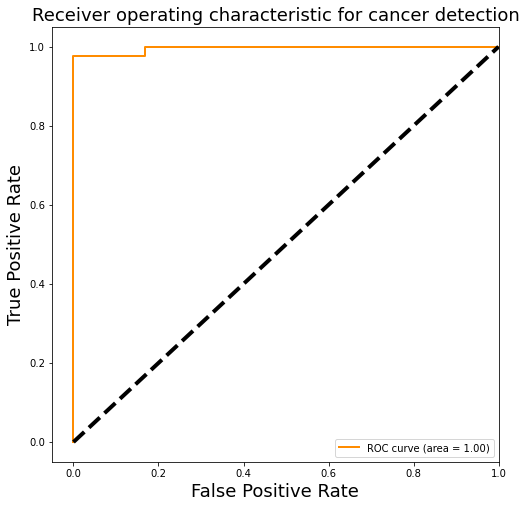

In [315]:
# For class 1, find the area under the curve
# Find fpr, tpr
fpr, tpr, _ = metrics.roc_curve(y_test, pred_test_prob_df.iloc[:,1])

# Find auc
roc_auc = metrics.auc(fpr, tpr)

# Plot of a ROC curve for class 1 (has_cancer)
plt.figure(figsize=[8,8])

# Plot fpr, tpr
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw = lw, label = 'ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Receiver operating characteristic for cancer detection', fontsize=18)
plt.legend(loc="lower right")
plt.show()

**References**

[Breast Cancer Wisconsin (Diagnostic) Data Set](https://www.kaggle.com/uciml/breast-cancer-wisconsin-data/downloads/breast-cancer-wisconsin-data.zip/2)

[Validation curves: plotting scores to evaluate models](https://scikit-learn.org/stable/modules/learning_curve.html#learning-curves)



---



---



> > > > > > > > > © 2021 Institute of Data


---



---



